In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../MLHW/datasets"))

# Any results you write to the current directory are saved as output.

['all.zip', 'data_description.txt', 'sample_submission.csv', 'sample_submission.csv.gz', 'test.csv', 'test.csv.gz', 'train.csv', 'train.csv.gz']


In [2]:
dfTrain = pd.read_csv('../MLHW/datasets/train.csv')
dfTest = pd.read_csv('../MLHW/datasets/test.csv')
#print(train_data)
#dfTrain.columns
print('shape of train : {}'.format(dfTrain.shape))
print('shape of test : {}'.format(dfTest.shape))
dfTrain.head(3)

shape of train : (1460, 81)
shape of test : (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
#describe data summary
dfTrain['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
total_miss = dfTrain.isnull().sum().sort_values(ascending=False)
miss_precent = (dfTrain.isnull().sum()/dfTrain.shape[0]).sort_values(ascending=False)
miss_data = pd.concat([total_miss,miss_precent],axis=1,keys=['total_miss','miss_precent'])
print(miss_data.head(30))

              total_miss  miss_precent
PoolQC              1453      0.995205
MiscFeature         1406      0.963014
Alley               1369      0.937671
Fence               1179      0.807534
FireplaceQu          690      0.472603
LotFrontage          259      0.177397
GarageCond            81      0.055479
GarageType            81      0.055479
GarageYrBlt           81      0.055479
GarageFinish          81      0.055479
GarageQual            81      0.055479
BsmtExposure          38      0.026027
BsmtFinType2          38      0.026027
BsmtFinType1          37      0.025342
BsmtCond              37      0.025342
BsmtQual              37      0.025342
MasVnrArea             8      0.005479
MasVnrType             8      0.005479
Electrical             1      0.000685
Utilities              0      0.000000
YearRemodAdd           0      0.000000
MSSubClass             0      0.000000
Foundation             0      0.000000
ExterCond              0      0.000000
ExterQual              0 

In [6]:
total_miss = dfTest.isnull().sum().sort_values(ascending=False)
miss_precent = (dfTest.isnull().sum()/dfTest.shape[0]).sort_values(ascending=False)
miss_data = pd.concat([total_miss,miss_precent],axis=1,keys=['total_miss','miss_precent'])
print(miss_data.head(50))

              total_miss  miss_precent
PoolQC              1456      0.997944
MiscFeature         1408      0.965045
Alley               1352      0.926662
Fence               1169      0.801234
FireplaceQu          730      0.500343
LotFrontage          227      0.155586
GarageCond            78      0.053461
GarageQual            78      0.053461
GarageYrBlt           78      0.053461
GarageFinish          78      0.053461
GarageType            76      0.052090
BsmtCond              45      0.030843
BsmtQual              44      0.030158
BsmtExposure          44      0.030158
BsmtFinType1          42      0.028787
BsmtFinType2          42      0.028787
MasVnrType            16      0.010966
MasVnrArea            15      0.010281
MSZoning               4      0.002742
BsmtHalfBath           2      0.001371
Utilities              2      0.001371
Functional             2      0.001371
BsmtFullBath           2      0.001371
BsmtFinSF2             1      0.000685
BsmtFinSF1             1 

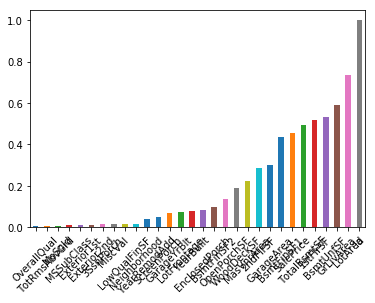

In [7]:
((dfTrain.apply(lambda x:x.unique().shape[0],axis=0)/dfTrain.shape[0]).sort_values(ascending = True).tail(30)).plot(kind='bar',rot=45)

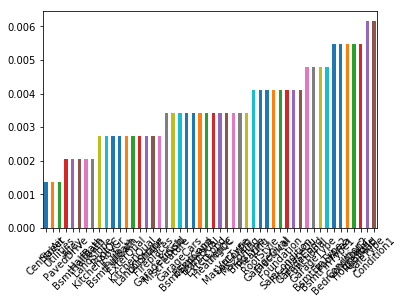

In [8]:
((dfTrain.apply(lambda x:x.unique().shape[0],axis=0)/dfTrain.shape[0]).sort_values(ascending = True).head(50)).plot(kind='bar',rot=45)

In [11]:
set(dfTrain["Utilities"])

{'AllPub', 'NoSeWa'}

In [27]:
#describe data summary
dfTrain['Utilities'].describe()

count       1456
unique         2
top       AllPub
freq        1455
Name: Utilities, dtype: object

In [12]:
dfTrain.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [13]:
#將原檔案去除 ID 欄位
dfTrain.drop('Id', axis = 1,inplace=True)
dfTest.drop('Id', axis = 1,inplace=True)

In [14]:
dfTrain.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


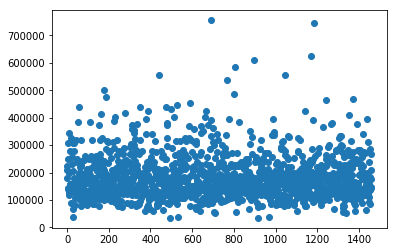

In [15]:
dfTrain['SalePrice'].shape[0]
plt.scatter(range(dfTrain['SalePrice'].shape[0]),dfTrain['SalePrice'].values)

In [18]:
.plot(kind='scatter')

ValueError: scatter requires and x and y column

C:\Users\Student\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Student\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


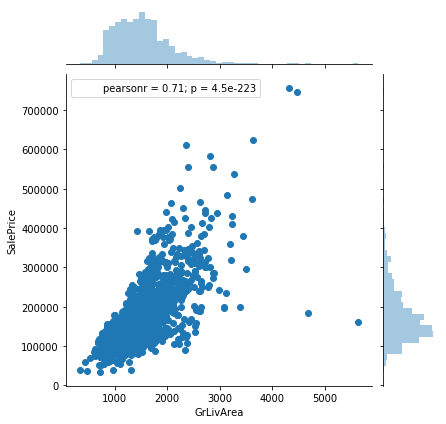

In [16]:
g = sns.jointplot(x='GrLivArea',y='SalePrice',data=dfTrain)

In [19]:
#後面觀察後在此先刪掉離群值
dfTrain = dfTrain.drop(dfTrain[(dfTrain['GrLivArea']>4000)].index)
dfTrain.shape

(1456, 80)

(array([ 16.,  80., 191., 348., 275., 170., 134.,  77.,  52.,  44.,  19.,
         18.,  12.,   8.,   4.,   2.,   0.,   3.,   1.,   2.]),
 array([ 34900.,  64405.,  93910., 123415., 152920., 182425., 211930.,
        241435., 270940., 300445., 329950., 359455., 388960., 418465.,
        447970., 477475., 506980., 536485., 565990., 595495., 625000.]),
 <a list of 20 Patch objects>)

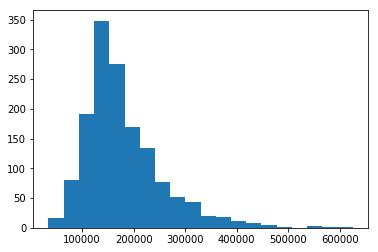

In [21]:
plt.hist(dfTrain['SalePrice'],bins=20)

(array([  4.,   1.,   0.,   6.,   9.,   8.,  48.,  52., 112., 205., 236.,
        229., 170., 146., 101.,  60.,  37.,  21.,   5.,   6.]),
 array([2.43888634, 2.45011387, 2.46134139, 2.47256892, 2.48379645,
        2.49502398, 2.50625151, 2.51747903, 2.52870656, 2.53993409,
        2.55116162, 2.56238915, 2.57361667, 2.5848442 , 2.59607173,
        2.60729926, 2.61852679, 2.62975431, 2.64098184, 2.65220937,
        2.6634369 ]),
 <a list of 20 Patch objects>)

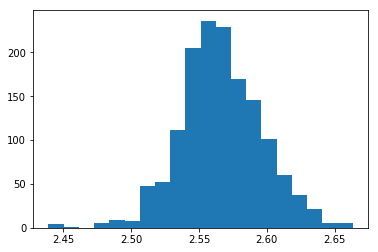

In [23]:
#對 SalePrice 使用 log(1+x) 使他趨於常態分布。
dfTrain["SalePrice"] = np.log1p(dfTrain["SalePrice"])
plt.hist(dfTrain['SalePrice'],bins=20)

In [24]:
#合併Train&Test以補空值
ntrain = dfTrain.shape[0]
ntest = dfTest.shape[0]
toTrain_y = dfTrain.SalePrice.values
dfToClean = pd.concat((dfTrain, dfTest)).reset_index(drop=True)
dfToClean.drop(['SalePrice'], axis=1, inplace=True)
print("rows of train are : {}".format(ntrain))
print("rows of test are : {}".format(ntest))
print("shape of df to clean is : {}".format(dfToClean.shape))

rows of train are : 1456
rows of test are : 1459
shape of df to clean is : (2915, 79)


C:\Users\Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """


## imputing missing value

In [24]:
dfToClean['LotFrontage'].describe()

count    2429.00000
mean       69.12886
std        22.71544
min        21.00000
25%        59.00000
50%        68.00000
75%        80.00000
max       313.00000
Name: LotFrontage, dtype: float64

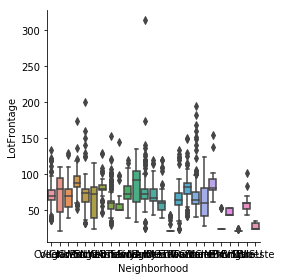

In [25]:
g=sns.factorplot(x="Neighborhood",y="LotFrontage",data=dfToClean,kind='box')

In [25]:
#將房屋不存在的設施補值為'None'
dfToClean['PoolQC']=dfToClean['PoolQC'].fillna("None")
dfToClean['MiscFeature']=dfToClean['MiscFeature'].fillna("None")
dfToClean['Alley']=dfToClean['Alley'].fillna("None")
dfToClean['Fence']=dfToClean['Fence'].fillna("None")
dfToClean['FireplaceQu']=dfToClean['FireplaceQu'].fillna("None")

#利用 GroupBy Neighborhood後的 LotFrontage中位數來補充 LotFrontage 之缺失值
dfToClean['LotFrontage'] = dfToClean.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#車庫、地下室以及砌磚牆面相關欄位根據type補'0'or'None'
for i in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    dfToClean[i] = dfToClean[i].fillna('None')
    
for i in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    dfToClean[i] = dfToClean[i].fillna(0)
    
dfToClean["MasVnrType"] = dfToClean["MasVnrType"].fillna("None")
dfToClean["MasVnrArea"] = dfToClean["MasVnrArea"].fillna(0)

#MSZoning, fill in missing values with 'RL'(最常見的)
dfToClean['MSZoning'] = dfToClean['MSZoning'].fillna(dfToClean['MSZoning'].mode()[0])

dfToClean = dfToClean.drop(['Utilities'], axis=1)

#Functional's NA means Typical
dfToClean["Functional"] = dfToClean["Functional"].fillna("Typ")

dfToClean['Electrical'] = dfToClean['Electrical'].fillna(dfToClean['Electrical'].mode()[0])
dfToClean['KitchenQual'] = dfToClean['KitchenQual'].fillna(dfToClean['KitchenQual'].mode()[0])
dfToClean['Exterior1st'] = dfToClean['Exterior1st'].fillna(dfToClean['Exterior1st'].mode()[0])
dfToClean['Exterior2nd'] = dfToClean['Exterior2nd'].fillna(dfToClean['Exterior2nd'].mode()[0])

dfToClean['SaleType'] = dfToClean['SaleType'].fillna(dfToClean['SaleType'].mode()[0])

dfToClean['MSSubClass'] = dfToClean['MSSubClass'].fillna("None")

#檢查是否還有缺失值
Cleaned_na = (dfToClean.isnull().sum() / len(dfToClean)) * 100
Cleaned_na = Cleaned_na.drop(Cleaned_na[Cleaned_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :Cleaned_na})
missing_data.head()

#dfToClean.head()

,Missing Ratio


C:\Users\Student\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Student\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


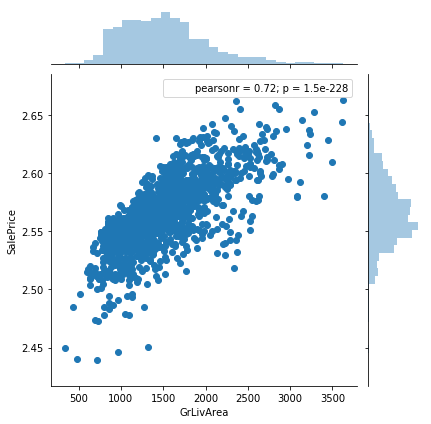

In [26]:
g = sns.jointplot(x='GrLivArea',y='SalePrice',data=dfTrain)

In [43]:
#Feature Engineering 部分

#去除離群值 (此步驟要移到前面執行)
#train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<300000)].index)

#將數值轉換成類別變數
dfToClean['MSSubClass'] = dfToClean['MSSubClass'].apply(str)
dfToClean['OverallCond'] = dfToClean['OverallCond'].astype(str)

#將年和月換成類別變數
dfToClean['YrSold'] = dfToClean['YrSold'].astype(str)
dfToClean['MoSold'] = dfToClean['MoSold'].astype(str)

#對欄位進行 Label Encoding
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
#對類別特徵進行 Label Encoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(dfToClean[c].values)) 
    dfToClean[c] = lbl.transform(list(dfToClean[c].values))
    

#增加一欄位
dfToClean['TotalSF'] = dfToClean['TotalBsmtSF'] + dfToClean['1stFlrSF'] + dfToClean['2ndFlrSF']

In [44]:
#進行 ONE HOT 編碼
dfToClean = pd.get_dummies(dfToClean)
print(dfToClean.shape)

cleaned_train = dfToClean[:ntrain]
cleaned_test = dfToClean[ntrain:] 
print(cleaned_train.shape)
print(cleaned_test.shape)

(2915, 220)
(1456, 220)
(1459, 220)


# Modeling

In [45]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC ,LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score
#import xgboost as xgb

In [46]:
toTrain_y = pd.DataFrame(toTrain_y)
toTrain_y.shape

(1456, 1)

In [47]:
toTrain = pd.concat([cleaned_train,y_train],axis=1)
toTrain.shape

(1456, 221)

## 資料切割並準化

In [48]:
#資料切割，80%為train,10%為val,10%為test
X_train, X_test, y_train, y_test = train_test_split(cleaned_train, toTrain_y, test_size=0.2, random_state=1)

X_test, X_val, y_test, y_val  = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [49]:
X_train.shape , X_val.shape

((1164, 220), (146, 220))

In [50]:
print(X_train.shape , y_train.shape)
print(X_val.shape , y_val.shape)
print(X_test.shape , y_test.shape)

(1164, 220) (1164, 1)
(146, 220) (146, 1)
(146, 220) (146, 1)


In [51]:
#標準化
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
#cv_X_train = scaler.transform(cv_X_train) 

## Lasso regression

In [54]:
alphaSpace = [0.001,0.002,0.003,0.004,0.005,0.01,0.05,0.1]
modles = []
for a in alphaSpace:
    regressor = Lasso(alpha=a,max_iter=1000000)
    model_L = regressor.fit(X_train,y_train)
    pred_y = model_L.predict(X_val)
    r2 = r2_score(y_val,pred_y)
    modles.append((a,r2,model_L))
#print("r2 of val is {:.4f}".format(r2_score(y_val,pred_y)))
sorted_models = pd.DataFrame(modles,columns=['alpha','r2','regressor']).sort_values('r2',ascending=False).reindex()
print(sorted_models)
#print(sorted_models['alpha'].iloc[0])
print('-------------------------------')
print("alpha of the best model is {}".format(sorted_models['alpha'].iloc[0]))
pred_val_y = sorted_models['regressor'].iloc[0].predict(X_val)
print("best model's r2 of val is {:.4f}".format(r2_score(y_val,pred_val_y)))
pred_test_y = sorted_models['regressor'].iloc[0].predict(X_test)
print("best model's r2 of test is {:.4f}".format(r2_score(y_test,pred_test_y)))

   alpha        r2                                          regressor
0  0.001  0.907329  Lasso(alpha=0.001, copy_X=True, fit_intercept=...
1  0.002  0.878748  Lasso(alpha=0.002, copy_X=True, fit_intercept=...
2  0.003  0.845383  Lasso(alpha=0.003, copy_X=True, fit_intercept=...
3  0.004  0.816698  Lasso(alpha=0.004, copy_X=True, fit_intercept=...
4  0.005  0.793531  Lasso(alpha=0.005, copy_X=True, fit_intercept=...
5  0.010  0.664813  Lasso(alpha=0.01, copy_X=True, fit_intercept=T...
6  0.050 -0.000019  Lasso(alpha=0.05, copy_X=True, fit_intercept=T...
7  0.100 -0.000019  Lasso(alpha=0.1, copy_X=True, fit_intercept=Tr...
-------------------------------
alpha of the best model is 0.001
best model's r2 of val is 0.9073
best model's r2 of test is 0.9196


In [55]:
#best_model交叉驗證
best_model = sorted_models['regressor'].iloc[0]
CVscores = cross_val_score(estimator=best_model, X=cleaned_train,y=toTrain_y,cv=10)
print(CVscores)

[0.85747779 0.90633079 0.89662585 0.88518573 0.88609372 0.87898228
 0.87970994 0.89401567 0.87361584 0.88809376]


In [56]:
print('CV score : {:.4} +/- {:.3f}'.format(np.mean(CVscores),np.std(CVscores)))

CV score : 0.8846 +/- 0.013


## Ridge regression

In [57]:
alphaSpace = [1.0,5.0,10,30,100,400,500,1000]
modles = []
for a in alphaSpace:
    regressor = Ridge(alpha = a,max_iter=1000000)
    model_R = regressor.fit(X_train,y_train)
    pred_y = model_R.predict(X_val)
    r2 = r2_score(y_val,pred_y)
    modles.append((a,r2,model_R))
#print("r2 of val is {:.4f}".format(r2_score(y_val,pred_y)))
sorted_models = pd.DataFrame(modles,columns=['alpha','r2','regressor']).sort_values('r2',ascending=False)
print(sorted_models)
#print(sorted_models['alpha'].iloc[0])
print('-------------------------------')
print("alpha of the best model is {}".format(sorted_models['alpha'].iloc[0]))
pred_val_y = sorted_models['regressor'].iloc[0].predict(X_val)
print("best model's r2 of val is {:.4f}".format(r2_score(y_val,pred_val_y)))
pred_test_y = sorted_models['regressor'].iloc[0].predict(X_test)
print("best model's r2 of test is {:.4f}".format(r2_score(y_test,pred_test_y)))
#print("alpha of the best model is {}".format(sorted_models['alpha'].iloc[0]))
         
#pred_test_y = sorted_models['regressor'].iloc[0].predict(X_test)  
#print("best model's r2 of test is {:.4f}".format(r2_score(pred_test_y,y_test)))

    alpha        r2                                          regressor
6   500.0  0.912044  Ridge(alpha=500, copy_X=True, fit_intercept=Tr...
5   400.0  0.911744  Ridge(alpha=400, copy_X=True, fit_intercept=Tr...
7  1000.0  0.906955  Ridge(alpha=1000, copy_X=True, fit_intercept=T...
4   100.0  0.900304  Ridge(alpha=100, copy_X=True, fit_intercept=Tr...
3    30.0  0.889046  Ridge(alpha=30, copy_X=True, fit_intercept=Tru...
2    10.0  0.881523  Ridge(alpha=10, copy_X=True, fit_intercept=Tru...
1     5.0  0.877550  Ridge(alpha=5.0, copy_X=True, fit_intercept=Tr...
0     1.0  0.870766  Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...
-------------------------------
alpha of the best model is 500.0
best model's r2 of val is 0.9120
best model's r2 of test is 0.9145


In [58]:
#交叉驗證
best_model = sorted_models['regressor'].iloc[0]
CVscores = cross_val_score(estimator=best_model, X=cleaned_train,y=toTrain_y,cv=10)
print('CV score : {:.4} +/- {:.3f}'.format(np.mean(CVscores),np.std(CVscores)))

CV score : 0.8965 +/- 0.013


## ElasticNet regression

In [59]:
alphaSpace = [0.005,0.01,0.05,0.1]
modles = []
for a in alphaSpace:
    regressor = ElasticNet(alpha = a,max_iter=1000000)
    model_E = regressor.fit(X_train,y_train)
    pred_y = model_E.predict(X_val)
    r2 = r2_score(y_val,pred_y)
    modles.append((a,r2,model_E))
#print("r2 of val is {:.4f}".format(r2_score(y_val,pred_y)))
sorted_models = pd.DataFrame(modles,columns=['alpha','r2','regressor']).sort_values('r2',ascending=False)
print(sorted_models)
#print(sorted_models['alpha'].iloc[0])
print('-------------------------------')
print("alpha of the best model is {}".format(sorted_models['alpha'].iloc[0]))
pred_val_y = sorted_models['regressor'].iloc[0].predict(X_val)
print("best model's r2 of val is {:.4f}".format(r2_score(y_val,pred_val_y)))
pred_test_y = sorted_models['regressor'].iloc[0].predict(X_test)
print("best model's r2 of test is {:.4f}".format(r2_score(y_test,pred_test_y)))
#print("alpha of the best model is {}".format(sorted_models['alpha'].iloc[0]))
         
#pred_test_y = sorted_models['regressor'].iloc[0].predict(X_test)  
#print("best model's r2 of test is {:.4f}".format(r2_score(pred_test_y,y_test)))

   alpha        r2                                          regressor
0  0.005  0.860935  ElasticNet(alpha=0.005, copy_X=True, fit_inter...
1  0.010  0.792868  ElasticNet(alpha=0.01, copy_X=True, fit_interc...
2  0.050 -0.000019  ElasticNet(alpha=0.05, copy_X=True, fit_interc...
3  0.100 -0.000019  ElasticNet(alpha=0.1, copy_X=True, fit_interce...
-------------------------------
alpha of the best model is 0.005
best model's r2 of val is 0.8609
best model's r2 of test is 0.8740


In [62]:
#交叉驗證
best_model = sorted_models['regressor'].iloc[0]
CVscores = cross_val_score(estimator=best_model, X=cleaned_train,y=toTrain_y,cv=10)
print('CV score : {:.4} +/- {:.3f}'.format(np.mean(CVscores),np.std(CVscores)))

CV score : 0.8673 +/- 0.016


## RandomForestRegression

In [74]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [75]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [76]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1227 (0.0095)

